# Name : Nivedita Chandra
**Data Science & Business Analytics Intern at The Sparks Foundation**

# Task : Prediction using Unsupervised ML
**Problem Statement:** From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually. 

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style= 'white', color_codes= True)

import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [2]:
# Reading data from the source location
iris= pd.read_csv(r"C:\Users\Silvo\Desktop\docs\TSF projects\task2_data_iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Summary Statistics
iris.drop('Id', axis= 1, inplace= True)
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



** **
# Visualization of the Dataset

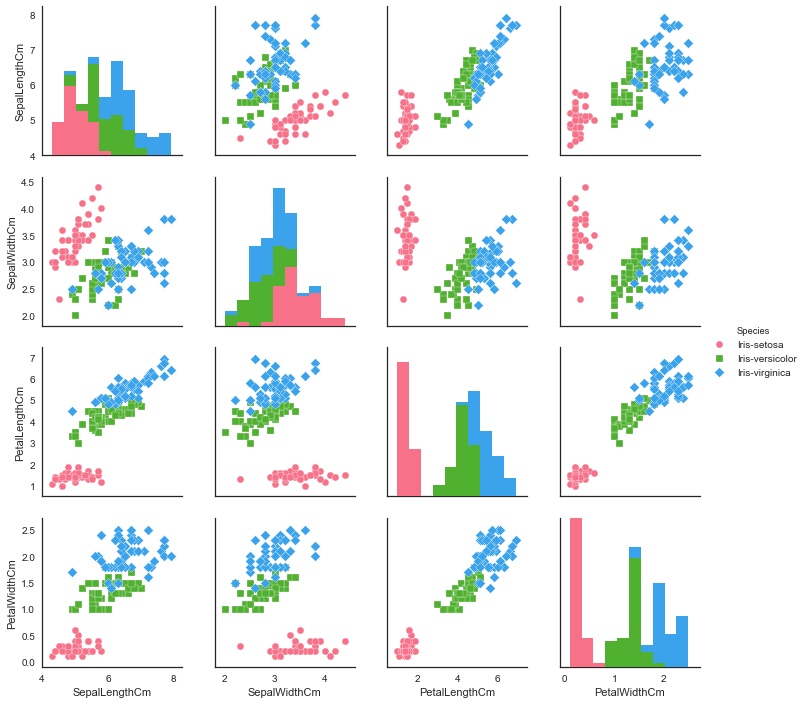

In [4]:
# Pairplot for iris data
sns.pairplot(iris, hue= 'Species', palette= 'husl', markers= ['o', 's', 'D'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CD1F828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D776390>]], dtype=object)

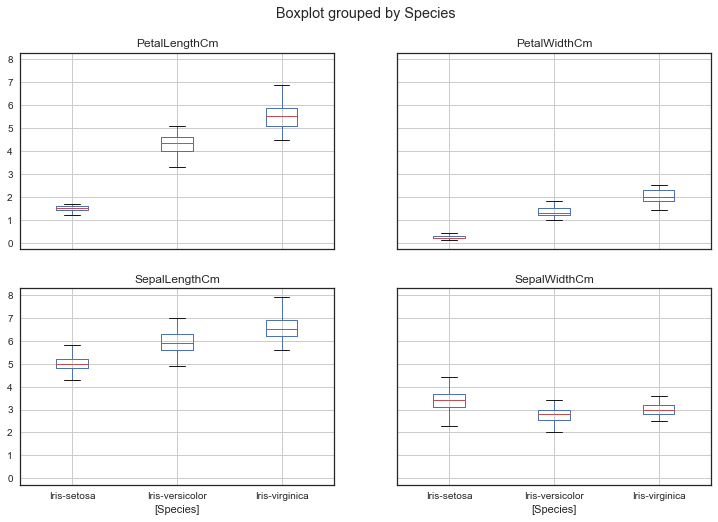

In [5]:
# Box plot for iris data
iris.boxplot(by= 'Species', figsize= (12,8))

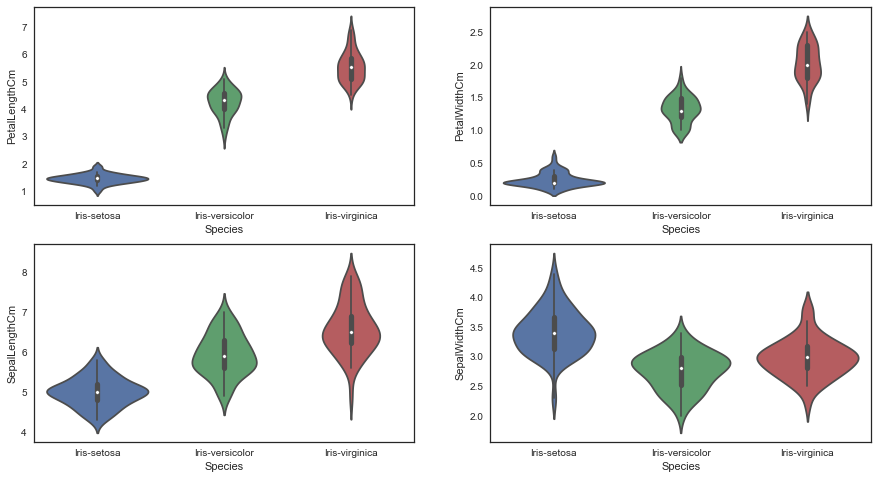

In [6]:
# Violin plot to check density of iris data
plt.figure(figsize= (15, 8))
plt.subplot(2, 2, 1)
sns.violinplot(x= 'Species', y= 'PetalLengthCm', data= iris)
plt.subplot(2, 2, 2)
sns.violinplot(x= 'Species', y= 'PetalWidthCm', data= iris)
plt.subplot(2, 2, 3)
sns.violinplot(x= 'Species', y= 'SepalLengthCm', data= iris)
plt.subplot(2, 2, 4)
sns.violinplot(x= 'Species', y= 'SepalWidthCm', data= iris)

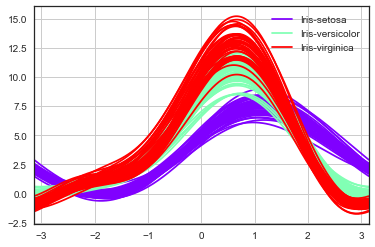

In [7]:
# Plotting structure of iris data
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, 'Species', colormap= 'rainbow')

** **
# Elbow Method to find optimum number of clusters

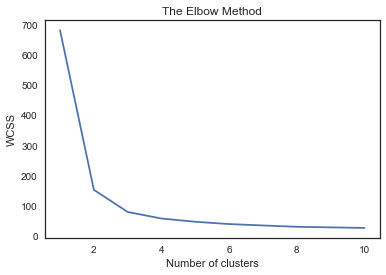

In [8]:
X= iris.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss= []
for i in range(1, 11):
    kmeans= KMeans(n_clusters= i, init= 'k-means++', random_state= 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**The elbows of the above curve gives the optimum number of clusters. The Within Cluster Sum of Square (WCSS) start decreasing significantly with each iteration and gets flattened after cluster 4. So, we choose optimum number of clusters as 3.** 

** **
# Training the model with K-Means Clustering technique

In [9]:
# Fitting the model
kmeans= KMeans(n_clusters= 3, init= 'k-means++', random_state= 50)
y_kmeans= kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

** Visualizing the Clusters**

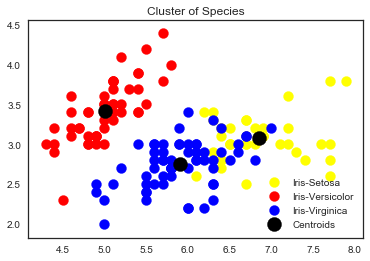

In [10]:
# Scatter plot of fitted model
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Iris-Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-Versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Cluster of Species')
plt.legend()
plt.show()

# Thank You :)